Task 1

Load 'recs2009_public.csv' into memory

In [2]:
import numpy as np
data = np.genfromtxt('recs2009_public.csv',delimiter=',', dtype="|S10")


Task 2

delete the first row and print the first row (of content) of the file

In [3]:
puredata = np.delete(data,(0),axis =0)


In [4]:
totalElecUse = puredata[:,839].astype(np.float)
totalSqFt = puredata[:,827].astype(np.float)
hhIncome = puredata[:,785].astype(np.float)
educationLevel = puredata[:,758].astype(np.float)
swimPool = puredata[:,590].astype(np.float)
tempSummer1 = puredata[:,547].astype(np.float)
tempSummer2 = puredata[:,548].astype(np.float)
tempSummer3 = puredata[:,549].astype(np.float)
tempWinter1 = puredata[:,467].astype(np.float)
tempWinter2 = puredata[:,468].astype(np.float)
tempWinter3 = puredata[:,469].astype(np.float)
heatDays1 = puredata[:,6].astype(np.float)
coldDays1 = puredata[:,7].astype(np.float)
yearBuilt = puredata[:,16].astype(np.float)
stories = puredata[:,28].astype(np.float)
windows = puredata[:,609].astype(np.float)
heatedSQ = puredata[:,829].astype(np.float)
cooledSQ = puredata[:,830].astype(np.float)

In [5]:
Y = np.divide(totalElecUse, totalSqFt)

In [ ]:
for i in range(930):
    x = puredata[:,i].astype(np.float)
    y = totalElecUse
    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(x, y)
    print i, "MIC", mine.mic()

In [12]:
from minepy import MINE

X = [heatedSQ,educationLevel,swimPool,tempSummer1,tempSummer2,tempSummer3,tempWinter1
     ,tempWinter2,tempWinter3,heatDays1,coldDays1,yearBuilt,stories,windows,heatedSQ,cooledSQ] 
y = totalElecUse
for x in X:    
    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(x, y)
    print "MIC", mine.mic()

MIC 0.16310067079
MIC 0.0554649003815
MIC 0.149738618605
MIC 0.20279187537
MIC 0.20279187537
MIC 0.20279187537
MIC 0.0593019604374
MIC 0.0723565796417
MIC 0.0629944893562
MIC 0.104332757167
MIC 0.101647202245
MIC 0.0907000146904
MIC 0.141090314649
MIC 0.112905582744
MIC 0.16310067079
MIC 0.0732789033065


In [ ]:
sklearn.ensemble.RandomForestClassifier.fit(X, y)

In [27]:
X= []
for i in xrange(len(totalElecUse)):
    temp=[]
    temp+=[totalSqFt[i]]+[hhIncomePvt[i]]+[hhIncome[i]]+[educationLevel[i]]+[tempSummer1[i]]+[tempSummer2[i]]+[tempSummer3[i]]
    temp+=[tempWinter1[i]]+[tempWinter2[i]]+[tempWinter3[i]]+[heatDays1[i]]+[heatDays2[i]]+[coldDays1[i]]+[coldDays2[i]]+[1]
    X.append(temp)
Y = totalElecUse

In [30]:
part1= np.linalg.inv(np.dot(np.transpose(X),X))
part2= np.dot(np.transpose(X),Y)
beta = np.dot(part1,part2)

In [34]:
pred_Y = np.dot(X,beta)
numind = list(range(1,12084))

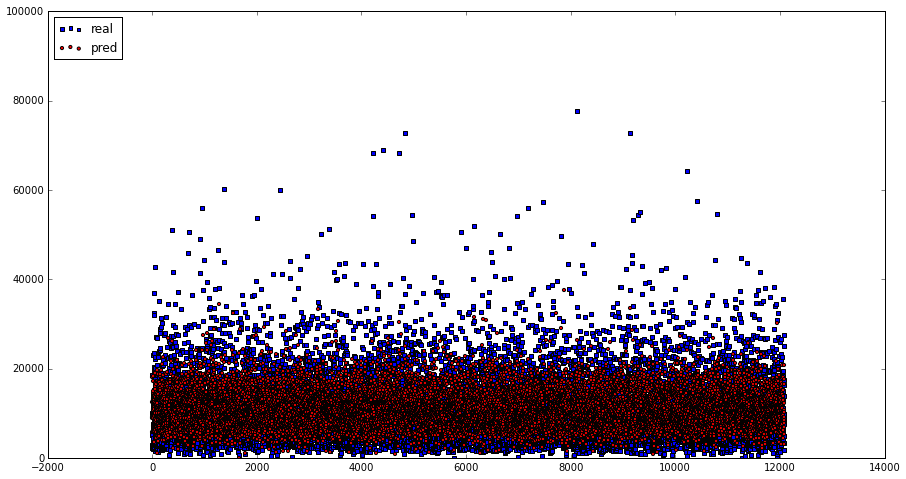

In [36]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(15,8))
plt.axis([-2000,14000,0,100000])
ax1 = fig.add_subplot(111)
ax1.scatter(numind, Y, s=10, c='b', marker='s', label='real')
ax1.scatter(numind, pred_Y, s=10, c='r',marker='o', label='pred')
plt.legend(loc='upper left');
plt.show()

In [46]:
def norm(list):
    lmin = min(list)
    lmax = max(list)
    newlist=[]
    for i in xrange(len(list)):
        temp = (list[i]-lmin)/(lmax-lmin)
        newlist.append(temp)
        
    return newlist



In [47]:
totalGasUse = norm(totalGasUse)
totalSqFt = norm(totalSqFt)
hhIncomePvt = norm(hhIncomePvt)
hhIncome = norm(hhIncome)
educationLevel = norm(educationLevel)
swimPool = norm(swimPool)
tempSummer1 = norm(tempSummer1)
tempSummer2 = norm(tempSummer2)
tempSummer3 = norm(tempSummer3)
tempWinter1 = norm(tempWinter1)
tempWinter2 = norm(tempWinter2)
tempWinter3 = norm(tempWinter3)
heatDays1 = norm(heatDays1)
heatDays2 = norm(heatDays2)
coldDays1 = norm(coldDays1)
coldDays2 = norm(coldDays2)

In [50]:
X= []
for i in xrange(len(totalElecUse)):
    temp=[]
    temp+=[totalSqFt[i]]+[hhIncomePvt[i]]+[hhIncome[i]]+[educationLevel[i]]+[tempSummer1[i]]+[tempSummer2[i]]+[tempSummer3[i]]
    temp+=[tempWinter1[i]]+[tempWinter2[i]]+[tempWinter3[i]]+[heatDays1[i]]+[heatDays2[i]]+[coldDays1[i]]+[coldDays2[i]]+[1]
    X.append(temp)
Y = totalElecUse

In [51]:
part1= np.linalg.inv(np.dot(np.transpose(X),X))
part2= np.dot(np.transpose(X),Y)
beta = np.dot(part1,part2)

In [52]:
pred_Y2 = np.dot(X,beta)
numind = list(range(1,12084))

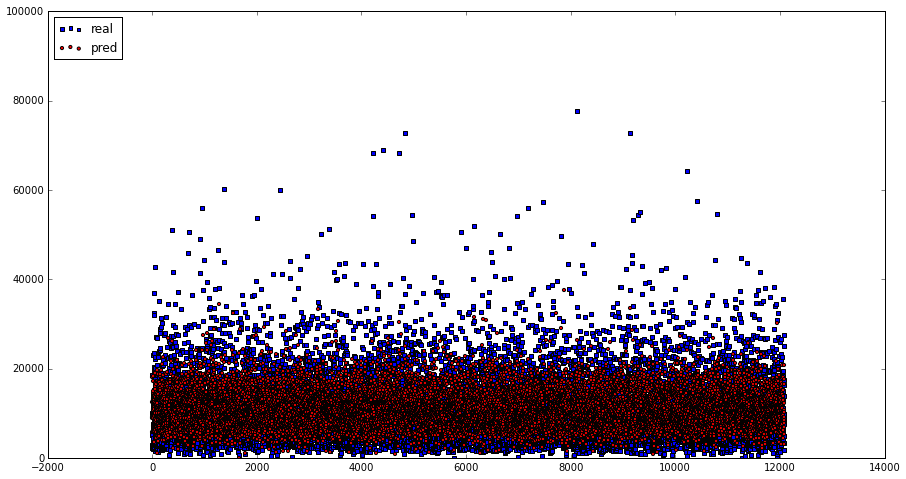

In [53]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(15,8))
plt.axis([-2000,14000,0,100000])
ax1 = fig.add_subplot(111)
ax1.scatter(numind, Y, s=10, c='b', marker='s', label='real')
ax1.scatter(numind, pred_Y2, s=10, c='r',marker='o', label='pred')
plt.legend(loc='upper left');
plt.show()

In [55]:
print beta

[ 28286.1018307    1466.48595913   3856.59632612  -3527.02132124
  24194.19678303 -16321.65847525  -5446.69566987   -303.04013227
   4309.16652214    223.03280993  17431.99648234 -16981.9765839
   8909.48958238    727.29138859   -436.67736443]


In [56]:
X= []
for i in xrange(len(totalElecUse)):
    temp=[]
    temp+=[totalSqFt[i]]+[hhIncomePvt[i]]+[hhIncome[i]]+[educationLevel[i]]+[tempSummer1[i]]+[tempSummer2[i]]+[tempSummer3[i]]
    temp+=[tempWinter2[i]]+[heatDays1[i]]+[heatDays2[i]]+[coldDays1[i]]+[1]
    X.append(temp)
Y = totalElecUse

In [57]:
part1= np.linalg.inv(np.dot(np.transpose(X),X))
part2= np.dot(np.transpose(X),Y)
beta = np.dot(part1,part2)

In [58]:
pred_Y3 = np.dot(X,beta)
numind = list(range(1,12084))

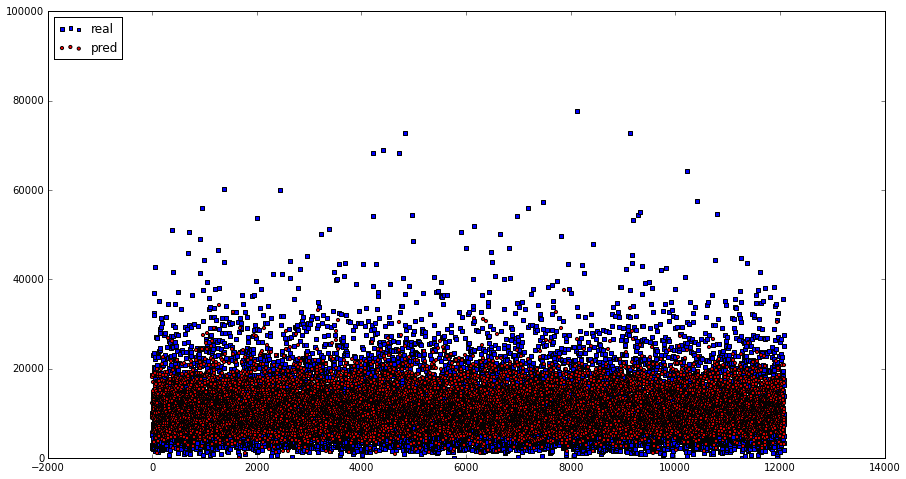

In [59]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(15,8))
plt.axis([-2000,14000,0,100000])
ax1 = fig.add_subplot(111)
ax1.scatter(numind, Y, s=10, c='b', marker='s', label='real')
ax1.scatter(numind, pred_Y3, s=10, c='r',marker='o', label='pred')
plt.legend(loc='upper left');
plt.show()

In [12]:
def calError(trueY, predY):
    res = 0.0
    for i in xrange(len(trueY)):
        res += (trueY[i]-predY[i])*(trueY[i]-predY[i])
    return res

In [4]:
Y = puredata[:,839].astype(np.float)
Y_validIndex = []
for i in xrange(len(Y)):
    if Y[i]<=40000:
        Y_validIndex.append(i)
Y_valid = np.take(Y,Y_validIndex)
print Y_valid.shape

# X1 = np.take(puredata[:,827].astype(np.float),Y_validIndex)
# X2 = np.take(puredata[:,786].astype(np.float),Y_validIndex)
# X3 = np.take(puredata[:,785].astype(np.float),Y_validIndex)
# X4 = np.take(puredata[:,758].astype(np.float),Y_validIndex)
# X5 = np.take(puredata[:,590].astype(np.float),Y_validIndex)
# X6 = np.take(puredata[:,547].astype(np.float),Y_validIndex)
# X7 = np.take(puredata[:,548].astype(np.float),Y_validIndex)
# X8 = np.take(puredata[:,549].astype(np.float),Y_validIndex)
# X9 = np.take(puredata[:,468].astype(np.float),Y_validIndex)
# X10 = np.take(puredata[:,469].astype(np.float),Y_validIndex)
# X11 = np.take(puredata[:,470].astype(np.float),Y_validIndex)
# X12 = np.take(puredata[:,6].astype(np.float),Y_validIndex)
# X13 = np.take(puredata[:,8].astype(np.float),Y_validIndex)
# X14 = np.take(puredata[:,7].astype(np.float),Y_validIndex)
# X15 = np.take(puredata[:,9].astype(np.float),Y_validIndex)

# X= []
# for i in xrange(len(Y_valid)):
#     temp=[]
#     temp+=[X1]+[X2]+[X3]+[X4]+[X5]+[X6]+[X7]+[X8]+[X9]+[X10]+[X11]+[X12]+[X13]+[X14]+[X15]
#     X.append(temp)
# Y = Y_valid

# part1= np.linalg.inv(np.dot(np.transpose(X),X))
# part2= np.dot(np.transpose(X),Y)
# beta = np.dot(part1,part2)

# pred_Y4 = np.dot(X,beta)

# print Y[0:10]
# print pred_Y4[0:10]

(12006,)


In [5]:
X1 = np.take(puredata[:,827].astype(np.float),Y_validIndex)
X2 = np.take(puredata[:,786].astype(np.float),Y_validIndex)
X3 = np.take(puredata[:,785].astype(np.float),Y_validIndex)
X4 = np.take(puredata[:,758].astype(np.float),Y_validIndex)
X5 = np.take(puredata[:,590].astype(np.float),Y_validIndex)
X6 = np.take(puredata[:,547].astype(np.float),Y_validIndex)
X7 = np.take(puredata[:,548].astype(np.float),Y_validIndex)
X8 = np.take(puredata[:,549].astype(np.float),Y_validIndex)
X9 = np.take(puredata[:,468].astype(np.float),Y_validIndex)
X10 = np.take(puredata[:,469].astype(np.float),Y_validIndex)
X11 = np.take(puredata[:,470].astype(np.float),Y_validIndex)
X12 = np.take(puredata[:,6].astype(np.float),Y_validIndex)
X13 = np.take(puredata[:,8].astype(np.float),Y_validIndex)
X14 = np.take(puredata[:,7].astype(np.float),Y_validIndex)
X15 = np.take(puredata[:,9].astype(np.float),Y_validIndex)

print X1.shape

(12006,)


In [10]:
X= []
for i in xrange(len(Y_valid)):
    temp=[]
    temp+=[X1[i]]+[X2[i]]+[X3[i]]+[X4[i]]+[X5[i]]+[X6[i]]+[X7[i]]+[X8[i]]+[X9[i]]+[X10[i]]+[X11[i]]+[X12[i]]+[X13[i]]+[X14[i]]+[X15[i]]+[1]
    X.append(temp)
Y = Y_valid

In [11]:
part1= np.linalg.inv(np.dot(np.transpose(X),X))
part2= np.dot(np.transpose(X),Y)
beta = np.dot(part1,part2)

pred_Y4 = np.dot(X,beta)

print Y[0:10]
print pred_Y4[0:10]

[ 18466.   5148.   2218.  10015.   2869.   6387.  11821.  22928.   9130.
   7474.]
[ 16253.98248573   9094.45897709   5056.09783702  12683.70030213
   9419.58884625  12282.1694491   12906.60310949  14381.15364
   8057.01254782  13166.8412358 ]


In [13]:
print calError(Y,pred_Y4)

382450696392.0
